### Importación de datos



In [125]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [126]:
ingresos ={
'Tienda1' : tienda1['Precio'].sum(),
'Tienda2' : tienda2['Precio'].sum(),
'Tienda3' : tienda3['Precio'].sum(),
'Tienda4' : tienda4['Precio'].sum()
}

tienda_max = max(ingresos, key=ingresos.get)

print(f'El ingreso total de tienda 1 es de {ingresos["Tienda1"]:,.2f}')
print(f'El ingreso total de tienda 2 es de {ingresos["Tienda2"]:,.2f}')
print(f'El ingreso total de tienda 3 es de {ingresos["Tienda3"]:,.2f}')
print(f'El ingreso total de tienda 4 es de {ingresos["Tienda4"]:,.2f}')
print('')
print(f'La tienda que vende más es {tienda_max} con {ingresos[tienda_max]:,.2f}')


El ingreso total de tienda 1 es de 1,150,880,400.00
El ingreso total de tienda 2 es de 1,116,343,500.00
El ingreso total de tienda 3 es de 1,098,019,600.00
El ingreso total de tienda 4 es de 1,038,375,700.00

La tienda que vende más es Tienda1 con 1,150,880,400.00


# 2. Ventas por categoría

In [127]:
categorias_tienda1 = sorted(tienda1['Categoría del Producto'].unique())
categorias_tienda2 = sorted(tienda2['Categoría del Producto'].unique())
categorias_tienda3 = sorted(tienda3['Categoría del Producto'].unique())
categorias_tienda4 = sorted(tienda4['Categoría del Producto'].unique())

print(f'Tienda 1 ({len(categorias_tienda1)} categorías):\n{categorias_tienda1}')
print(f'Tienda 2 ({len(categorias_tienda2)} categorías):\n{categorias_tienda2}')
print(f'Tienda 3 ({len(categorias_tienda3)} categorías):\n{categorias_tienda3}')
print(f'Tienda 4 ({len(categorias_tienda4)} categorías):\n{categorias_tienda4}')


Tienda 1 (8 categorías):
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
Tienda 2 (8 categorías):
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
Tienda 3 (8 categorías):
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
Tienda 4 (8 categorías):
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']


In [128]:

ventas_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)

top_5_tienda1 = ventas_categoria_tienda1.head(5)
top_5_tienda2 = ventas_categoria_tienda2.head(5)
top_5_tienda3 = ventas_categoria_tienda3.head(5)
top_5_tienda4 = ventas_categoria_tienda4.head(5)

comparativa_top5_categorias = pd.concat(
    [top_5_tienda1,top_5_tienda2,top_5_tienda3,top_5_tienda4],
    axis=1,
    keys=['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
)
print(comparativa_top5_categorias)

categorias = {
    'Tienda1': top_5_tienda1,
    'Tienda2': top_5_tienda2,
    'Tienda3': top_5_tienda3,
    'Tienda4': top_5_tienda4
}

for tienda, datos in categorias.items():
    print(f'\n{tienda} — Categorías más vendidas:')
    for categoria, cantidad in datos.items():
        print(f'  • {categoria}: {cantidad} productos')


                        Tienda1  Tienda2  Tienda3  Tienda4
Categoría del Producto                                    
Muebles                     465      442      499      480
Electrónicos                448      422      451      451
Juguetes                    324      313      315      338
Electrodomésticos           312      305      278      254
Deportes y diversión        284      275      277      277

Tienda1 — Categorías más vendidas:
  • Muebles: 465 productos
  • Electrónicos: 448 productos
  • Juguetes: 324 productos
  • Electrodomésticos: 312 productos
  • Deportes y diversión: 284 productos

Tienda2 — Categorías más vendidas:
  • Muebles: 442 productos
  • Electrónicos: 422 productos
  • Juguetes: 313 productos
  • Electrodomésticos: 305 productos
  • Deportes y diversión: 275 productos

Tienda3 — Categorías más vendidas:
  • Muebles: 499 productos
  • Electrónicos: 451 productos
  • Juguetes: 315 productos
  • Electrodomésticos: 278 productos
  • Deportes y diversión: 2

# 3. Calificación promedio de la tienda


In [129]:
valoraciones = {
    'Tienda1': tienda1['Calificación'].mean(),
    'Tienda2': tienda2['Calificación'].mean(),
    'Tienda3': tienda3['Calificación'].mean(),
    'Tienda4': tienda4['Calificación'].mean(),
}


for nombre, promedio in valoraciones.items():
    print(f'La valoración de la {nombre} es de: {promedio:.2f}')

valoracion_max = max(valoraciones, key=valoraciones.get)

print('')
print(f'La tienda con mejor valoración promedio es {valoracion_max} con {valoraciones[valoracion_max]:.2f}.')


La valoración de la Tienda1 es de: 3.98
La valoración de la Tienda2 es de: 4.04
La valoración de la Tienda3 es de: 4.05
La valoración de la Tienda4 es de: 4.00

La tienda con mejor valoración promedio es Tienda3 con 4.05.


# 4. Productos más y menos vendidos

In [130]:
productos_tienda1 = tienda1.groupby('Producto').size().sort_values(ascending=False)
productos_tienda2 = tienda2.groupby('Producto').size().sort_values(ascending=False)
productos_tienda3 = tienda3.groupby('Producto').size().sort_values(ascending=False)
productos_tienda4 = tienda4.groupby('Producto').size().sort_values(ascending=False)

productos_mas_vendidos = {
    'Tienda1': productos_tienda1.head(5),
    'Tienda2': productos_tienda2.head(5),
    'Tienda3': productos_tienda3.head(5),
    'Tienda4': productos_tienda4.head(5)
}

productos_menos_vendidos = {
    'Tienda1': productos_tienda1.tail(5),
    'Tienda2': productos_tienda2.tail(5),
    'Tienda3': productos_tienda3.tail(5),
    'Tienda4': productos_tienda4.tail(5)
}

mejor_tienda = ''
mejor_producto = ''
mayor_ventas = 0

peor_tienda = ''
peor_producto = ''
menor_ventas = None


for tienda, datos in productos_mas_vendidos.items():
    print(f'\n{tienda} — Productos más vendidos:')
    for producto, cantidad in datos.items():
        print(f'  • {producto}: {cantidad}')

    producto_top = datos.idxmax()
    ventas_top = datos.max()

    if ventas_top > mayor_ventas:
        mayor_ventas = ventas_top
        mejor_producto = producto_top
        mejor_tienda = tienda

for tienda, datos in productos_menos_vendidos.items():
    print(f'\n{tienda} — Productos menos vendidos:')
    for producto, cantidad in datos.items():
        print(f'  • {producto}: {cantidad}')

    producto_peor = datos.idxmin()
    ventas_peor = datos.min()

    if menor_ventas is None or ventas_peor < menor_ventas:
        menor_ventas = ventas_peor
        peor_producto = producto_peor
        peor_tienda = tienda

print('')
print(f'El producto más vendido entre todas las tiendas es "{mejor_producto}" en {mejor_tienda}, con {mayor_ventas} ventas.')
print(f'El producto menos vendido entre todas las tiendas es "{peor_producto}" en {peor_tienda}, con {menor_ventas} ventas.')




Tienda1 — Productos más vendidos:
  • Armario: 60
  • TV LED UHD 4K: 60
  • Microondas: 60
  • Secadora de ropa: 58
  • Mesa de noche: 56

Tienda2 — Productos más vendidos:
  • Iniciando en programación: 65
  • Microondas: 62
  • Batería: 61
  • Pandereta: 58
  • Guitarra acústica: 58

Tienda3 — Productos más vendidos:
  • Kit de bancas: 57
  • Mesa de comedor: 56
  • Cama king: 56
  • Set de ollas: 55
  • Mesa de noche: 55

Tienda4 — Productos más vendidos:
  • Cama box: 62
  • Cubertería: 59
  • Cama king: 56
  • Dashboards con Power BI: 56
  • Carrito de control remoto: 55

Tienda1 — Productos menos vendidos:
  • Mochila: 39
  • Pandereta: 36
  • Olla de presión: 35
  • Celular ABXY: 33
  • Auriculares con micrófono: 33

Tienda2 — Productos menos vendidos:
  • Auriculares: 37
  • Sillón: 35
  • Impresora: 34
  • Mesa de comedor: 34
  • Juego de mesa: 32

Tienda3 — Productos menos vendidos:
  • Guitarra eléctrica: 38
  • Mochila: 36
  • Microondas: 36
  • Set de vasos: 36
  • Bloque

# 5. Envío promedio por tienda

In [131]:
envios = {
    'Tienda1': tienda1['Costo de envío'].mean(),
    'Tienda2': tienda2['Costo de envío'].mean(),
    'Tienda3': tienda3['Costo de envío'].mean(),
    'Tienda4': tienda4['Costo de envío'].mean(),
}

tienda_envio_max = max(envios, key=envios.get)

for nombre, promedio in envios.items():
    print(f'El promedio de costo de envio para {nombre} es de: {promedio:,.2f}')

print('')
print(f'La tienda con mayor costo promedio de envío es {tienda_envio_max} con {envios[tienda_envio_max]:,.2f}.')

El promedio de costo de envio para Tienda1 es de: 26,018.61
El promedio de costo de envio para Tienda2 es de: 25,216.24
El promedio de costo de envio para Tienda3 es de: 24,805.68
El promedio de costo de envio para Tienda4 es de: 23,459.46

La tienda con mayor costo promedio de envío es Tienda1 con 26,018.61.


#6. Gráficos

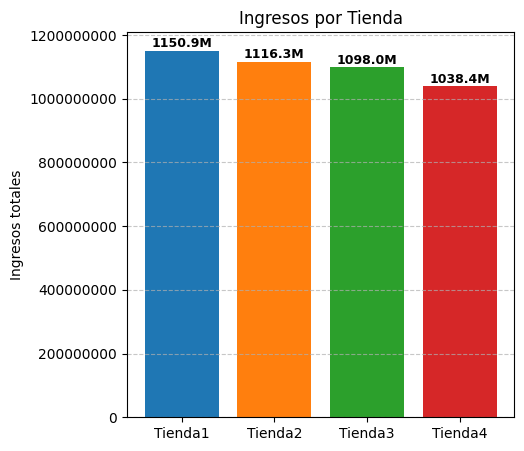

In [132]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(ingresos.keys(), ingresos.values(), color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('Ingresos totales')
ax.set_title('Ingresos por Tienda')
ax.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(ingresos.values()):
    ax.text(i, v + v*0.01, f'{v/1e6:.1f}M', ha='center', fontweight='bold', fontsize=9)
plt.show()


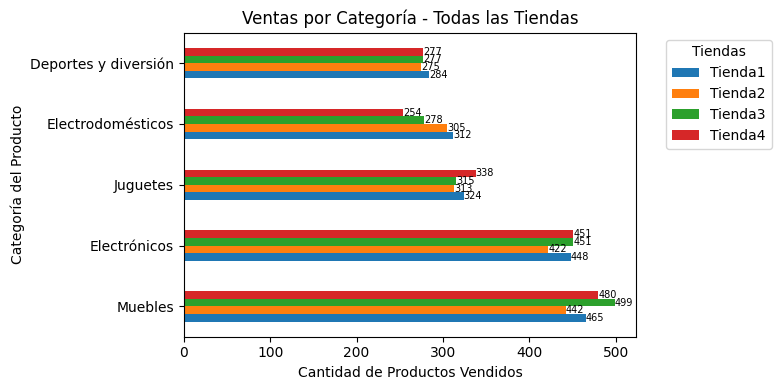

In [133]:
ax = comparativa_top5_categorias.plot(kind='barh', figsize=(8, 4), color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.title('Ventas por Categoría - Todas las Tiendas')
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Categoría del Producto')
plt.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=7)

plt.show()


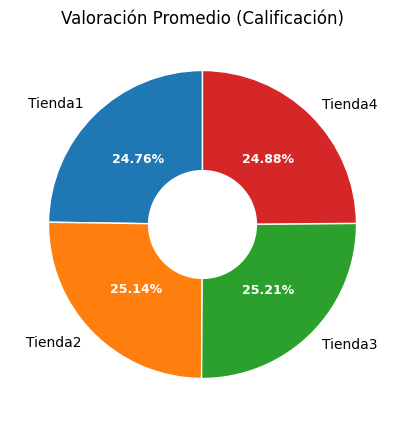

In [134]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    valoraciones.values(),
    labels=valoraciones.keys(),
    autopct='%1.2f%%',
    startangle=90,
    colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'],
    wedgeprops={'width': 0.65, 'edgecolor': 'white'}
)

ax.set_title('Valoración Promedio (Calificación)')
plt.setp(autotexts, size=9, weight='bold', color='white')
plt.show()


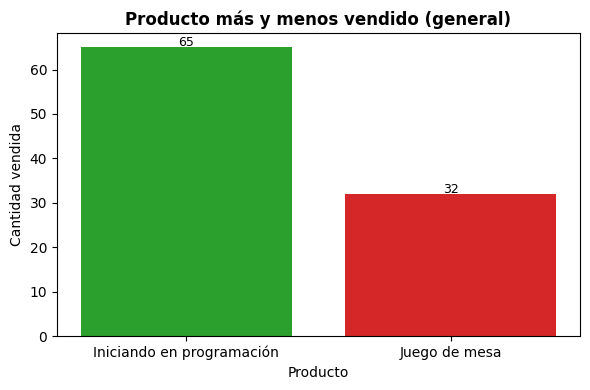

In [135]:
import matplotlib.pyplot as plt

productos = [mejor_producto, peor_producto]
ventas = [mayor_ventas, menor_ventas]
colores = ['tab:green', 'tab:red']

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(productos, ventas, color=colores)


ax.set_title('Producto más y menos vendido (general)', fontweight='bold')
ax.set_ylabel('Cantidad vendida')
ax.set_xlabel('Producto')

for i, v in enumerate(ventas):
    ax.text(i, v + 0.3, f'{v}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


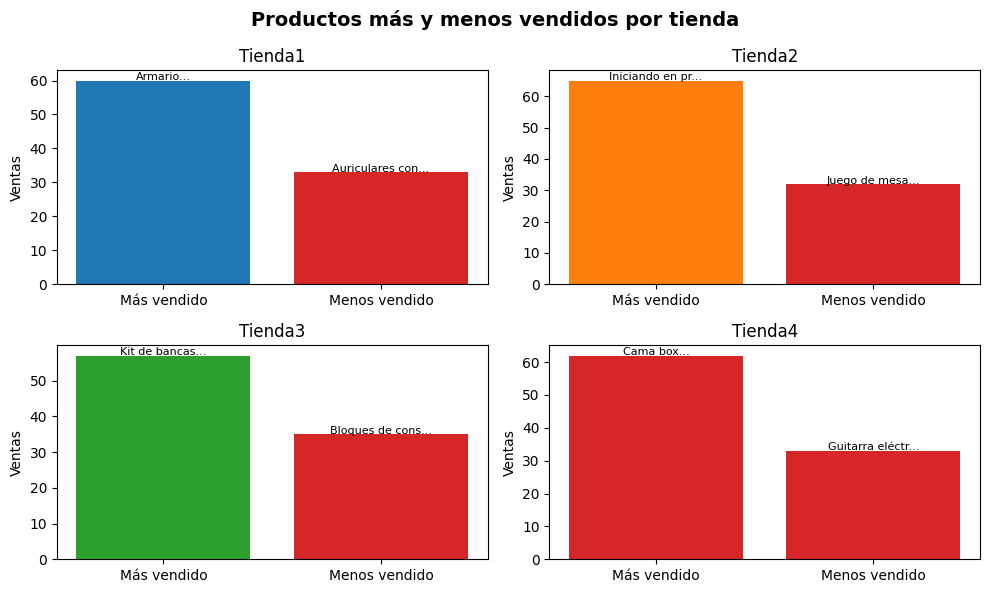

In [136]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Productos más y menos vendidos por tienda', fontsize=14, fontweight='bold')

for ax, (tienda, color) in zip(axes.flat, zip(productos_mas_vendidos.keys(), colors)):
    top = productos_mas_vendidos[tienda].head(1)
    bottom = productos_menos_vendidos[tienda].tail(1)


    ax.bar(['Más vendido', 'Menos vendido'], [top.values[0], bottom.values[0]], color=[color, 'tab:red'])
    ax.set_title(tienda)
    ax.set_ylabel('Ventas')


    ax.text(0, top.values[0] + 0.1, top.index[0][:15] + '...', ha='center', fontsize=8)
    ax.text(1, bottom.values[0] + 0.1, bottom.index[0][:15] + '...', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


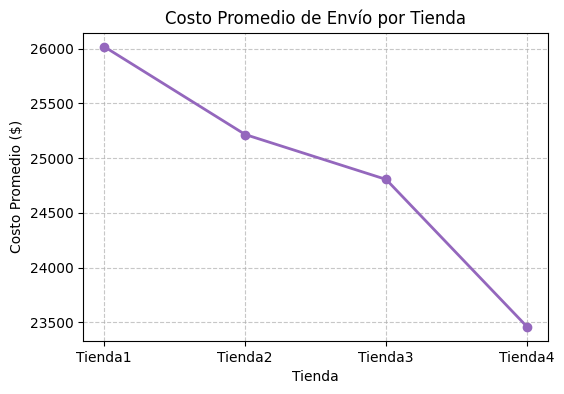

In [137]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(envios.keys(), envios.values(), marker='o', color='tab:purple', linewidth=2)
ax.set_title('Costo Promedio de Envío por Tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Costo Promedio ($)')
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()



#7. Informe final

Informe final — Recomendación

Después de analizar los datos de las cuatro tiendas de Alura Store, considerando ingresos, categorías de productos, calificaciones de clientes, productos más y menos vendidos y costos de envío, se concluye lo siguiente:

- Todas las tiendas trabajan con las mismas categorías de productos, por lo que no existe diferencia en la oferta.
- La Tienda 1 registra los mayores ingresos, mientras que la Tienda 4 muestra los menores.
- Las valoraciones y ventas de productos reflejan que la Tienda 4 tiene menor desempeño general.

Conclusión:
Se recomienda que el Sr. Juan venda la Tienda 4, ya que es la menos eficiente de la cadena: obtiene los menores ingresos y peor rendimiento general, sin ofrecer ventajas adicionales frente a las demás tiendas.


#8. Extra

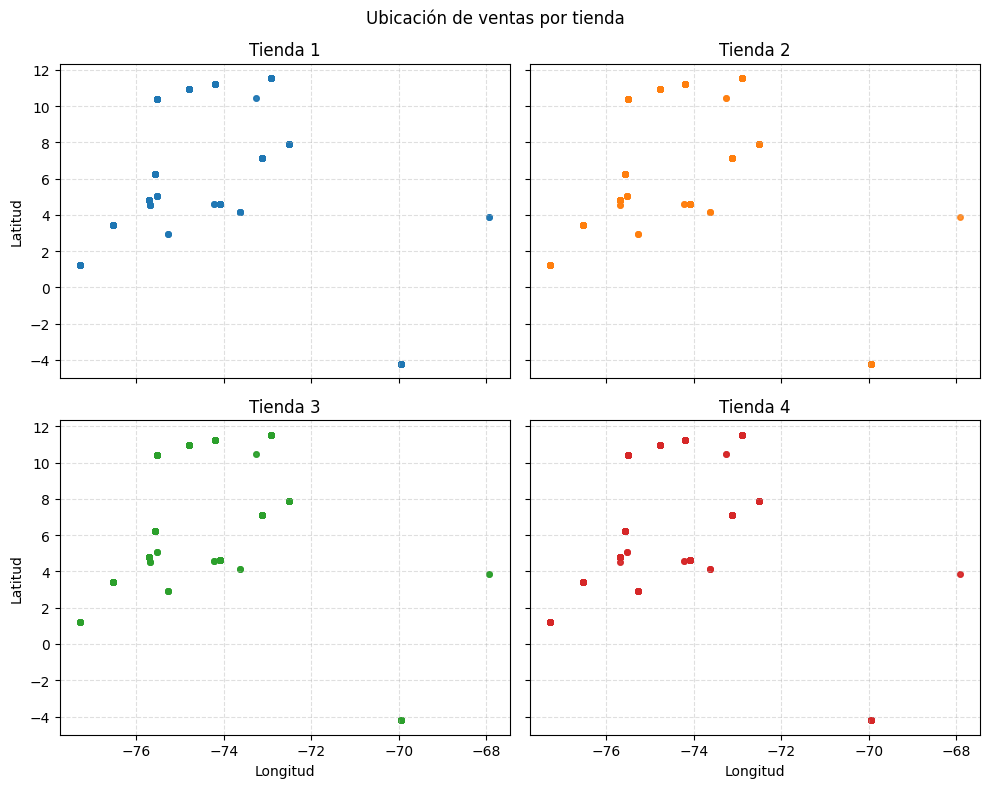

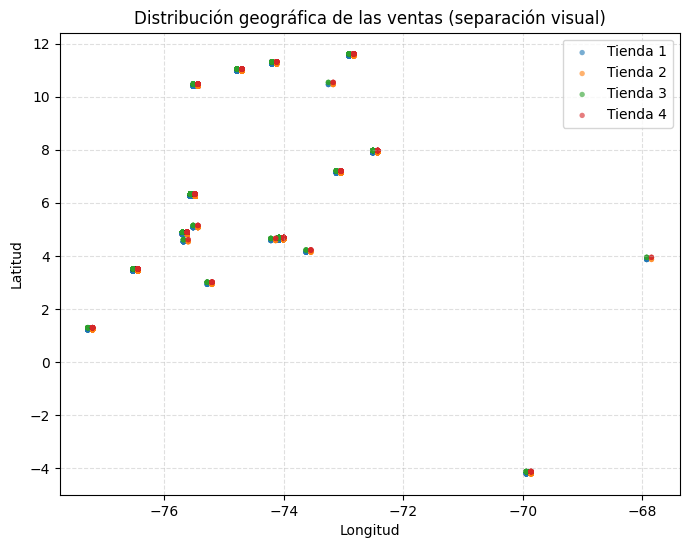

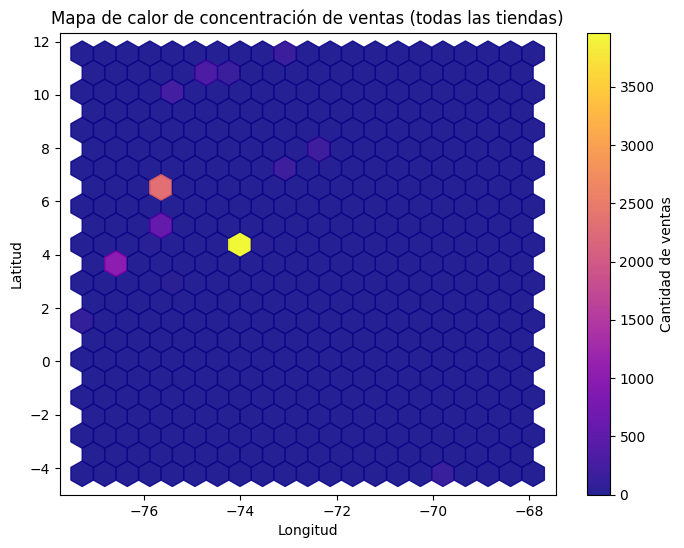

In [138]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

todas_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle('Ubicación de ventas por tienda')

datos_por_tienda = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}
colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for ax, (nombre, df), color in zip(axes.flat, datos_por_tienda.items(), colores):
    ax.scatter(df['lon'], df['lat'], s=15, alpha=0.6, color=color)
    ax.set_title(nombre)
    ax.grid(True, linestyle='--', alpha=0.4)

for ax in axes[-1]:
    ax.set_xlabel('Longitud')
for ax in axes[:, 0]:
    ax.set_ylabel('Latitud')

plt.tight_layout()
plt.show()


desplazamiento = {
    'Tienda 1': (0.00, 0.00),
    'Tienda 2': (0.08, 0.00),
    'Tienda 3': (0.00, 0.08),
    'Tienda 4': (0.08, 0.08),
}
colores_dict = {
    'Tienda 1': 'tab:blue',
    'Tienda 2': 'tab:orange',
    'Tienda 3': 'tab:green',
    'Tienda 4': 'tab:red'
}

plt.figure(figsize=(8, 6))
for tienda, df_t in todas_tiendas.groupby('Tienda'):
    dx, dy = desplazamiento[tienda]
    plt.scatter(
        df_t['lon'] + dx,
        df_t['lat'] + dy,
        s=15,
        alpha=0.6,
        label=tienda,
        color=colores_dict[tienda],
        edgecolors='none'
    )

plt.title('Distribución geográfica de las ventas (separación visual)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

plt.figure(figsize=(8, 6))
plt.hexbin(todas_tiendas['lon'], todas_tiendas['lat'],
           gridsize=20, cmap='plasma', alpha=0.9)
plt.colorbar(label='Cantidad de ventas')
plt.title('Mapa de calor de concentración de ventas (todas las tiendas)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


#9. Conclusión geográfica

Al analizar las coordenadas geográficas (latitud y longitud) de las ventas, se observa que las cuatro tiendas
operan en zonas similares, sin diferencias significativas en la cobertura de ventas. No hay concentración
exclusiva por tienda ni patrones geográficos marcados que expliquen la diferencia de ingresos.

Esto sugiere que el rendimiento de las tiendas depende más de factores de gestión y atención al cliente
que de la ubicación geográfica de las compras.